# Initialization

In [1]:
from mxESP32Debugger.debugger import Dbg as MXDBG
import time

dev = MXDBG()

2025-03-22 16:00:24.983 | INFO     | mxESP32Debugger.debugger:connect:249 - Using serial port to connect. Port: COM4
2025-03-22 16:00:24.984 | INFO     | mxESP32Debugger.debugger:connect:254 - Using ESP32-S3R8.
2025-03-22 16:00:24.984 | INFO     | mxESP32Debugger.debugger:connect:255 - Embedded software version: v1.0
2025-03-22 16:00:24.985 | INFO     | mxESP32Debugger.debugger:connect:256 - Library version: v241210.0.rc3.


# I2C Write and Read

In [ ]:
power_address = 0x20  # including LDP (P00 ~ P07) / VDD (P10 ~ P17)
mot_address = 0x18
i2c_address = 0x70
ots_address = 0x74

callisto_register_list = [
    
    # basic settings
    [0x09, 0x5A],
    [0x3C, 0xAC],
    [0x09, 0xA5],
    [0x6D, 0x39],
    [0x19, 0x04],
    [0x0D, 0x20, 0x20],

    # advanced settings
    [0x3E, 0x71],
    [0x48, 0xFF],
    [0x1F, 0xFF],
    [0x73, 0x10],

    [0x68, 0x7F, 0x84],
    [0x7D, 0x60],
    # [0x7E, 0x00],
    [0x60, 0x00],
    [0x6E, 0x37],
    [0x3F, 0x01],
    [0x52, 0x2E],
    [0x3F, 0x00],
    [0x0B, 0x70],
    [0x05, 0xBC],
]

In [ ]:
ret, data = dev.i2c_write_read(0x74, [0x06, 0x91], 0)
print(ret, data)

for reg in callisto_register_list:
    ret, data = dev.i2c_write_read(0x74, reg, 0)
ret, data = dev.i2c_write_read(0x74, [0x00], 2)
print(ret, data)

# I2C Configuration

In [ ]:
ret, data = dev.i2c_config(sda_pin=10, scl_pin=11, freq=400000, sda_pullup=True, scl_pullup=True)
print(ret, data)

# GPIO Configuration

In [ ]:
ret = dev.gpio_config(pin=40,
                    mode=dev.gpio_mode["GPIO_MODE_OUTPUT"],
                    pull_up=1,
                    pull_down=0)
print(ret)

# GPIO write and read

In [ ]:
for _ in range(100):
    ret, data = dev.gpio_write_read(40, 1)
    print(ret, data)
    time.sleep(1)
    ret, data = dev.gpio_write_read(40, 0)
    print(ret, data)
    time.sleep(1)

# PWM run and stop

In [ ]:
ret, data = dev.pwm_run_stop(True, 0)
print(ret, data)


In [ ]:
ret, data = dev.pwm_run_stop(False, 0)
print(ret, data)
ret, data = dev.pwm_run_stop(False, 1)
print(ret, data)
ret, data = dev.pwm_run_stop(False, 2)
print(ret, data)

# PWM Configuration

In [ ]:
ret, data = dev.pwm_config(pin=16, freq=10_000, duty=0.5, channel=0, resolution_hz=80_000_000)
print(ret, data)
 


# SPI write and read
## 3WIRE HALF DUPLEX SPI

In [ ]:
for _ in range(100):
    ret, data = dev.spi_write_read([0x01], 1)
    assert data[0] == 0x59, "read_error"

## 4WIRE FULL DUPLEX SPI

In [ ]:
ret, data = dev.spi_write_read([0x00, 0x00], 2)
print(ret, data)
ret, data = dev.spi_write_read([0x01, 0x00], 2)
print(ret, data)

# SPI Configuration
## 3WIRE HALF DUPLEX SPI

In [ ]:
ret, data = dev.spi_config(freq=1000000,
                           miso_io_num=-1,
                           cs_ena_pretrans=1,
                           cs_ena_posttrans=1,
                           device_interface_flags=(dev.spi_device["SPI_DEVICE_HALFDUPLEX"] | dev.spi_device["SPI_DEVICE_3WIRE"])
                           )
print(ret, data)

# Power Control

In [ ]:
observe_time_s = 3
for _ in range(4):
    dev.power_control(communication_type="I2C", power_type="1V2")
    time.sleep(observe_time_s)
    dev.power_control(communication_type="I2C", power_type="1V8")
    time.sleep(observe_time_s)
    dev.power_control(communication_type="I2C", power_type="3V3")
    time.sleep(observe_time_s)
    dev.power_control(communication_type="I2C", power_type="0V")
    time.sleep(observe_time_s)

In [ ]:
observe_time_s = 3
for _ in range(4):
    dev.power_control(communication_type="SPI", power_type="1V2")
    time.sleep(observe_time_s)
    dev.power_control(communication_type="SPI", power_type="1V8")
    time.sleep(observe_time_s)
    dev.power_control(communication_type="SPI", power_type="3V3")
    time.sleep(observe_time_s)
    dev.power_control(communication_type="SPI", power_type="0V")
    time.sleep(observe_time_s)

# Expand IO Write and Read

> Both ExtBoard v0.1 and ExtBoard v0.2.1 are supported now.

**How to use it?**: 
1. Call `dev.expand_io_config()` to configure the expand IO as input or output mode.
2. Call `dev.expand_io_write_read()` to write or read the expand IO just like the normal GPIO called as `dev.gpio_write_read()`.

**NOTE**:
1. `IO0` (the rightest pin in `J4`) is in open-drain mode in default in ExtBoard v0.1, which means that you need use a pull-up resistor to pull up the voltage level to high level physically.

In [ ]:
# in ExtBoard v0.1

# try to read level
ret, data = dev.expand_io_write_read(7)
print(ret, data)

# try to configure IO7 as an output pin
ret, data = dev.expand_io_config(7, 1)
print(ret, data)

# try to set pin as low level
ret, data = dev.expand_io_write_read(7, 0)
print(ret, data)

# try to read level
ret, data = dev.expand_io_write_read(7)
print(ret, data)

In [ ]:
# in ExtBoard v0.2.1

#! ATTENTION: IO6(1V8_1) / IO7(1V8_2) / IO10(3V3_1) / IO11(3V3_2) are not 
#!            supported to be configured as an input pin.

# the power resource pins has 3 ways to control, just as follows.

ret, data = dev.expand_io_write_read("1v8_1", 1) 
print(ret, data)

ret, data = dev.expand_io_write_read("IO6", 1)
print(ret, data)

ret, data = dev.expand_io_write_read(6, 1)
print(ret, data)

# ADC

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dev.usb_config(False)

(True, None)

In [52]:
channel_config_list = [
    {
        "attenuation": 3,
        "channel": 3,
        "bit_width": 12
    },
    {
        "attenuation": 3,
        "channel": 4,
        "bit_width": 12
    },
]

ret, data = dev.adc_config(channel_config_list, 
                           sampling_frequency=10_000)

2025-03-22 16:18:56.406 | DEBUG    | mxESP32Debugger.debugger:adc_config:1181 - Sampling Frequency: 10000


In [18]:
atten_dict = {
    0: {
      'min_range': 0, # mv
        'max_range': 950,  # mv 
    },
    1: {
        'min_range': 0, # mv
        'max_range': 1250,  # mv
    },
    2: {
        'min_range': 0, # mv
        'max_range': 1750,  # mv
    },
    3: {
        'min_range': 0, # mv
        'max_range': 3100,  # mv
    },
}

[26711, 32768, 26712, 32768, 26713, 32768, 26713, 32768, 26715, 32768]


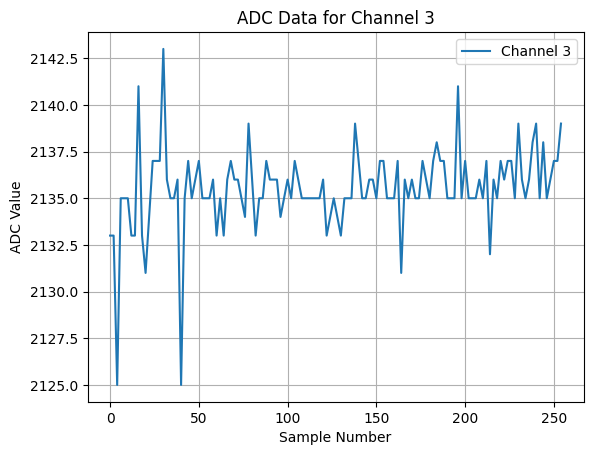

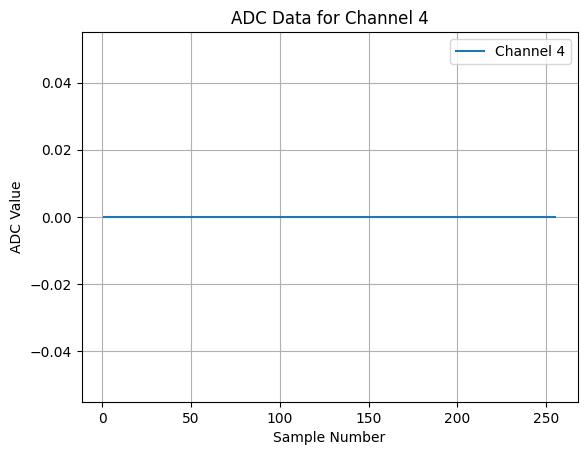

In [53]:

ret, data = dev.adc_read(read_len=256, timeout=1)
assert ret, "read adc data error"
data_np = np.frombuffer(data, dtype='<u4')
print(data_np.tolist()[-10:])
data_list = []

for d in data_np:
    temp = {}
    temp['data']    = (d & int('0000_0000_0000_0000_0000_1111_1111_1111',2)) >> 0
    temp['channel'] = (d & int('0000_0000_0000_0001_1110_0000_0000_0000',2)) >> 13
    temp['unit']    = (d & int('0000_0000_0000_0010_0000_0000_0000_0000',2)) >> 17
    temp['voltage'] = temp['data'] * 3.1 / (2**12)
    data_list.append(temp)
    
data_df = pd.DataFrame(data_list)

# print(data_df)
# plot all the data according to the channel
for channel in data_df['channel'].unique():
    data_df_channel = data_df[data_df['channel'] == channel]
    plt.plot(data_df_channel['data'], label=f'Channel {channel}')
    plt.title(f'ADC Data for Channel {channel}')
    plt.xlabel('Sample Number')
    plt.ylabel('ADC Value')
    plt.legend()
    plt.grid()
    plt.show()

# Restart

In [ ]:
dev.restart()